In [1]:
from os import listdir
import cv2
import sys
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

input_path = '../data/Set1Part0'
output_path = "pikles"
img_size=(30,30,3)


#Read in image files
# images_files = [f for f in listdir(input_path + 'dataset')]
images_files = [f for f in listdir(input_path)]

images_files = images_files[:400]

images = {}

for image_file in images_files:
    images[image_file] = (cv2.imread(input_path + "/" + image_file))

In [2]:
from collections import defaultdict

dicti = defaultdict(list)

with open("../data/annotations.txt") as f:
    for line in f:
        line_split = line.split(",")
        if len(line_split)>=4:
            x_max = line_split[1]
            y_max = line_split[2]
            x_min = line_split[3]
            y_min = line_split[4]
            name = line_split[0].split(':')[0]
            
            dicti[name] += (x_min, x_max, y_min, y_max)

In [3]:
dicti

defaultdict(list,
            {'1277381655Image000002.jpg': [' 521.545082',
              ' 547.856366',
              ' 509.470324',
              ' 534.637640'],
             '1277381655Image000007.jpg': [' 538.217824',
              ' 566.874451',
              ' 506.358141',
              ' 534.587056'],
             '1277381655Image000012.jpg': [' 580.346221',
              ' 615.349298',
              ' 475.962085',
              ' 510.079008'],
             '1277381655Image000017.jpg': [' 682.706066',
              ' 734.514285',
              ' 428.440966',
              ' 476.071103'],
             '1277381655Image000022.jpg': [' 840.566823',
              ' 915.566823',
              ' 349.185815',
              ' 426.185815'],
             '1277381671Image000002.jpg': [' 638.753875',
              ' 656.124924',
              ' 551.832335',
              ' 568.720854'],
             '1277381671Image000007.jpg': [' 619.245140',
              ' 638.041940',
              ' 551

In [300]:
from random import randrange
from random import randint, choice

imgs = []
not_signs = []
label_type = []
label_sign = []
img_size = 30
label_visibility = []

with open("../data/annotations.txt") as f:
    line = f.readline()
    while line != '':
        line = line.split(':')
        if line[1] == '' or line[1] == "\n":
            line = f.readline()
            continue
        name = line[0]
        signs = line[1].split(';')
        signs = signs[0:(len(signs)-1)]
        for sign in signs:
            if sign == 'MISC_SIGNS':
                continue
            if name not in images:
                continue
            splitted = sign.split(", ")

            coord1 = (splitted[3],splitted[4])
            coord2 = (splitted[1],splitted[2])
            
            y_min = int(float(coord1[1]))
            y_max = int(float(coord2[1]))
            
            x_min = int(float(coord1[0]))
            x_max = int(float(coord2[0]))
            
            img = images[name][y_min:y_max, x_min:x_max,:]
            imgs.append(cv2.resize(img, [32,32]))
            

            y_of_img = size_of_img[0]
            x_of_img = size_of_img[1]
            
            width = x_max - x_min
            height = y_max - y_min
            
            new_x_max, new_y_max = 0, 0
            
            if (x_max+width) < x_of_img and (y_max+height) < y_of_img:
                new_x_max = randrange(x_max+width, x_of_img)
                new_y_max = randrange(y_max+height, y_of_img)
            
            elif (x_min-width) > 0 and (y_min-height) > 0:
                new_x_max = randrange(width, x_min)
                new_y_max = randrange(height, y_min)
            else:
                continue
            
            not_sign = images[name][new_y_max-height:new_y_max, new_x_max-width:new_x_max,:]
            not_signs.append(cv2.resize(not_sign, [32,32]))
            
        
        line = f.readline()

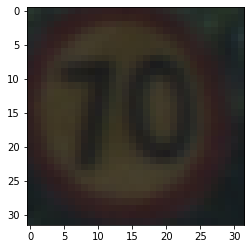

In [90]:
RGB_img = cv2.cvtColor(imgs[6], cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img) # RGB

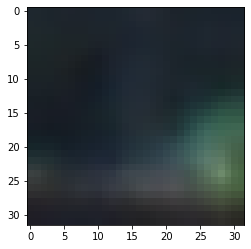

In [99]:
RGB_not_sign = cv2.cvtColor(not_signs[92], cv2.COLOR_BGR2RGB)
plt.imshow(RGB_not_sign)

In [102]:
print(RGB_not_sign.flatten())

[30 39 46 ... 40 39 34]


In [104]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [139]:
flat_data_arr=[] #input array
target_arr=[] #output array

In [140]:
for i in imgs:
    flat_data_arr.append(i.flatten())
    target_arr.append('sign')

In [141]:
for i in not_signs:
    flat_data_arr.append(i.flatten())
    target_arr.append('not_sign')

In [142]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [143]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [144]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)

Splitted Successfully


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [145]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
['sign' 'not_sign' 'sign' 'not_sign' 'not_sign' 'sign' 'not_sign' 'sign'
 'not_sign' 'sign' 'sign' 'not_sign' 'sign' 'not_sign' 'sign' 'not_sign'
 'sign' 'not_sign' 'sign' 'not_sign' 'sign' 'not_sign' 'not_sign' 'sign'
 'sign' 'sign' 'not_sign' 'sign' 'sign' 'sign' 'sign' 'not_sign' 'sign'
 'not_sign' 'not_sign' 'sign' 'not_sign' 'not_sign' 'not_sign' 'not_sign'
 'sign' 'sign' 'not_sign' 'sign' 'not_sign' 'not_sign' 'not_sign' 'sign'
 'not_sign' 'sign' 'not_sign' 'sign' 'not_sign' 'sign' 'sign' 'sign'
 'not_sign' 'not_sign' 'sign' 'sign' 'not_sign' 'not_sign' 'not_sign'
 'sign' 'sign' 'not_sign' 'not_sign' 'sign' 'not_sign' 'sign' 'sign'
 'not_sign' 'not_sign' 'not_sign' 'not_sign' 'sign' 'not_sign' 'sign'
 'not_sign' 'sign' 'sign' 'not_sign' 'sign' 'sign' 'not_sign' 'not_sign'
 'sign' 'not_sign' 'sign' 'sign' 'sign' 'not_sign' 'not_sign' 'sign'
 'sign' 'not_sign' 'not_sign' 'sign' 'not_sign' 'sign' 'sign' 'not_sign'
 'sign' 'sign' 'sign' 'sign' 'sign' 'not_sign

In [363]:
def classify_signs(classifier_model, img_list, confidence):
    # returns 1 if sign, 0 if not
    
    flat_data_arr_ = []
    
    for i in img_list:
        flat_data_arr_.append(cv2.resize(i, [32, 32]).flatten())
    
    flat_data_=np.array(flat_data_arr_)

    df_=pd.DataFrame(flat_data_) #dataframe
    df_['Target']="useless"
    x_=df_.iloc[:,:-1] #input data 
    
    pred = classifier_model.predict_proba(x_)
    
    preds = []
    for i in pred:
        if i[0] >= confidence:
            preds.append(0)
        else:
            preds.append(1)
    return preds

In [400]:
sign_list = imgs[0:50]
not_sign_list = not_signs[0:50]
conf = 0.631
# RGB_img = cv2.cvtColor(ns_img, cv2.COLOR_BGR2RGB)
# plt.imshow(RGB_img) # RGB

classified_signs = classify_signs(model, sign_list, conf)
classified_not_signs = classify_signs(model, not_sign_list, conf)

print(len(np.where(classified_signs)[0])/len(classified_signs))
print(len(np.where(classified_not_signs)[0])/len(classified_not_signs))

1.0
0.06


### Basically 100% of signs were classified as signs and 6% of non-signs (random places) were classified as signs, however, this is data from what it was trained on so not the most accurate